# House Price Prediction using Linear Regression

This notebook follows the **CRISP-DM** methodology to analyze and model a real estate dataset.

## 1. Business Understanding

**Objective:**

Predict the house price of unit area (10000 NTD / Ping) based on transaction date, house age, distance to MRT, number of nearby convenience stores, and geographic location.

**Business Questions:**
- Which factors most strongly affect house prices?
- How accurately can prices be predicted using a linear model?

**Success Criteria:**
- A model with reasonable explanatory power (R²)
- Interpretable coefficients

## 2. Data Understanding

The dataset contains the following variables:

- X1: Transaction date
- X2: House age (years)
- X3: Distance to nearest MRT (meters)
- X4: Number of convenience stores
- X5: Latitude
- X6: Longitude
- Y: House price of unit area (target)

We first load the data and inspect its structure.

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Load dataset
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes)
df = real_estate_valuation.data.original

df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Basic statistics

In [2]:

df.describe()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [3]:

df.isnull().sum()


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## 3. Data Preparation

Steps performed:
- Drop "No" Collum
- Select features and target
- Train-test split
- Feature scaling

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Y house price of unit area', 'No'])
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Modeling

### 4.1 Model Selection

We choose **Multiple Linear Regression** because:
- The target variable is continuous
- Interpretability is important
- Relationships are assumed approximately linear

In [22]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4.2 Parameter Estimation

The model learns coefficients that quantify the relationship between each feature and the house price.

In [21]:

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'intercept': model.intercept_
})

coefficients


,Feature,Coefficient,intercept
0,X1 transaction date,1.531024,37.604532
1,X2 house age,-3.076261,37.604532
2,X3 distance to the nearest MRT station,-6.262864,37.604532
3,X4 number of convenience stores,2.369985,37.604532
4,X5 latitude,3.008652,37.604532
5,X6 longitude,-0.646455,37.604532


Based on the standardized regression coefficients, distance to the nearest MRT station has the strongest effect on house price, exhibiting a pronounced negative relationship. This is followed by the number of nearby convenience stores and house age, while transaction date and geographic coordinates have comparatively smaller effects.

## 5. Evaluation

### 5.1 Predictive Performance

We evaluate the model using R² and RMSE.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

eval = pd.DataFrame({
    'MSE': [mse],
    'MAE': [mae]

})
eval


,MSE,MAE
0,68.306974,5.985657


Mean Squared Error (MSE) shows how large the model’s prediction mistakes are on average, with big mistakes having a much stronger effect than small ones. Lower values are better,
Mean Absolute Error (MAE) shows the average size of the prediction errors in the same units as house price, making it easy to understand. A good MAE is one that is small compared to typical house prices.

### 5.2 Model Diagnostics

Residual analysis helps verify linear regression assumptions.

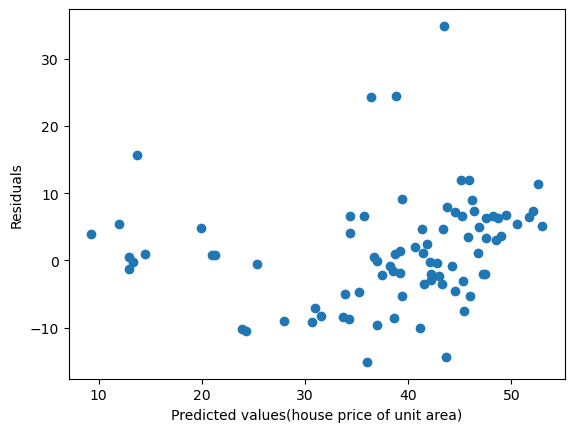

In [30]:

import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values(house price of unit area)")
plt.ylabel("Residuals")
plt.show()


## 6. Deployment

**Usage:**
- The trained model can be used to estimate house prices for new data after applying the same scaling.

**Limitations:**
- Assumes linear relationships
- Location effects may be more complex than latitude/longitude